# Square Wave Example

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pioemu import emulate, State

## Introduction

This notebook demonstrates the emulation of a PIO program for the Raspberry Pi Foundation's RP2040 Microcontroller. This program produces a square-wave output with a 50% duty cycle.

## PIO Program

Below is the PIO program that will be emulated. Try changing it and observing the results!

In [2]:
program = [
    0xE081,  # 0: set pindirs, 1
    0xE101,  # 1: set pins, 1 [1]
    0xE000,  # 2: set pins, 0
    0x0001,  # 3: jmp 1
]

## Emulation

In [3]:
pin_value_series = [
    (state.clock, state.pin_values & 0x01)
    for _, state in emulate(program, max_clock_cycles=32 + 1)
]

## Output on Pin GP0

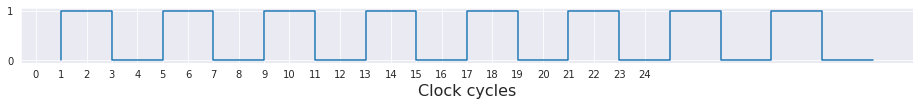

In [4]:
x_values = [clock for clock, logic_level in pin_value_series]
y_values = [logic_level for clock, logic_level in pin_value_series]

sns.set_style("darkgrid")
figure = plt.figure(figsize=(16, 1))
plot = sns.lineplot(x=x_values, y=y_values, drawstyle="steps-pre")
plot.set_xlabel("Clock cycles", fontsize = 16)
_ = plot.set_xticks(range(0, len(x_values)))